# Step 1: Reading and Understanding the Data

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [109]:
bike_sharing = pd.read_csv("day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [110]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [111]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 2: Visualising the Data

In [112]:
# Dropping unwanted columns

bike_sharing.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)


In [113]:
# Mapping columns 
bike_sharing.weathersit = bike_sharing.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})


In [114]:
bike_sharing.season = bike_sharing.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


In [115]:
bike_sharing.mnth = bike_sharing.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [116]:
bike_sharing.weekday = bike_sharing.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [117]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


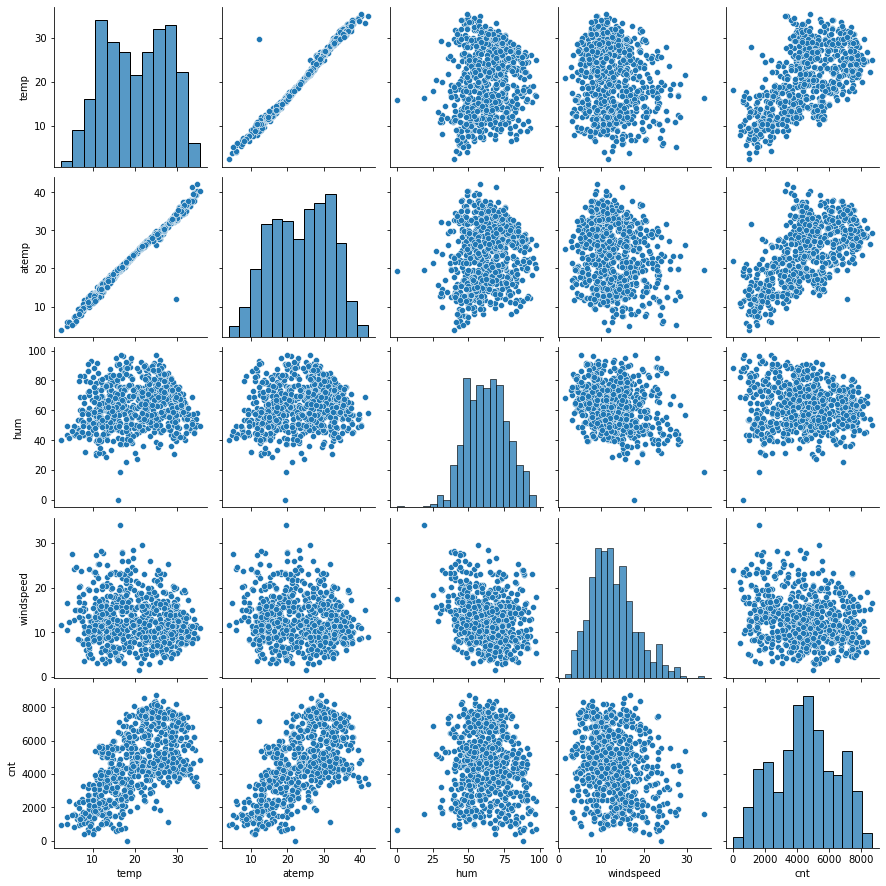

In [118]:
# Visualizing numeric data
sns.pairplot(data=bike_sharing,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

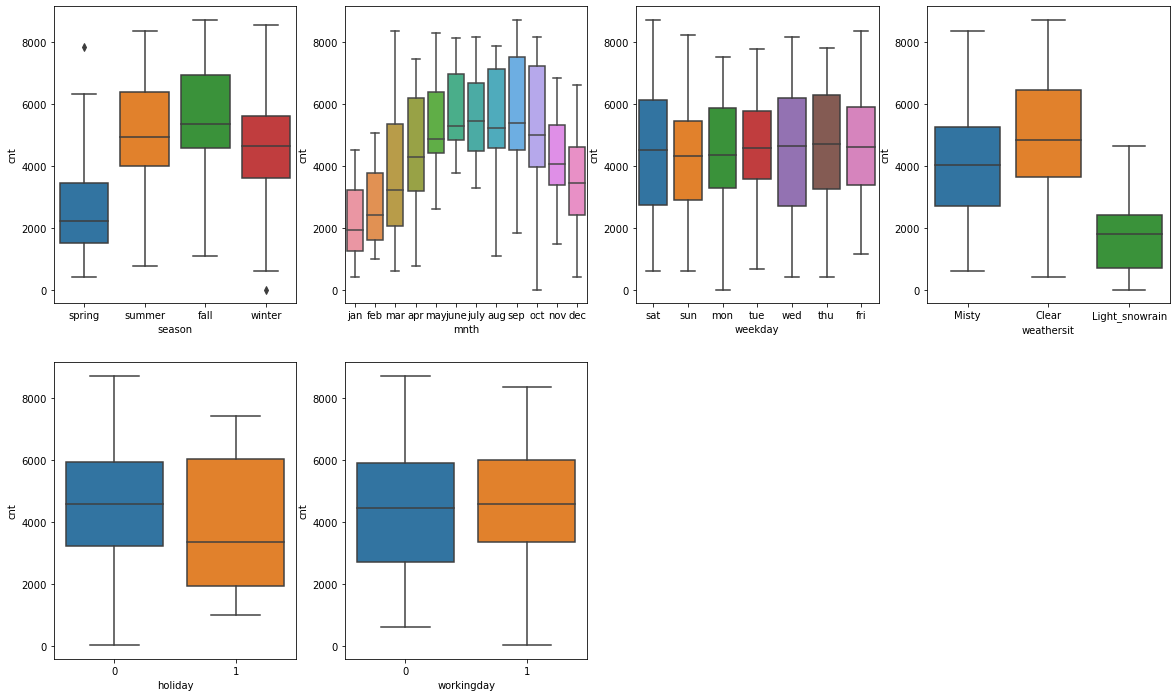

In [119]:
# visualizing categorical data
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.show()

# Step 3: Data Preparation

In [120]:
# Creating dummy vars
seasons_d=pd.get_dummies(bike_sharing.season,drop_first=True)
mnth_d=pd.get_dummies(bike_sharing.mnth,drop_first=True)
weekdays_d=pd.get_dummies(bike_sharing.weekday,drop_first=True)
weathersit_d=pd.get_dummies(bike_sharing.weathersit,drop_first=True)

In [121]:
bike_sharing = pd.concat([bike_sharing,mnth_d,weekdays_d,weathersit_d,seasons_d],axis=1)

In [122]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [123]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bike_sharing.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [124]:
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


# Step 4: Splitting the Data into Training and Testing Sets

In [125]:
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, random_state = 100)

In [126]:
df_train.shape

(510, 30)

In [127]:
df_test.shape

(220, 30)

In [128]:
# Rescaling the features - MinMaxScaler
scaler = MinMaxScaler()

In [129]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [130]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [131]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


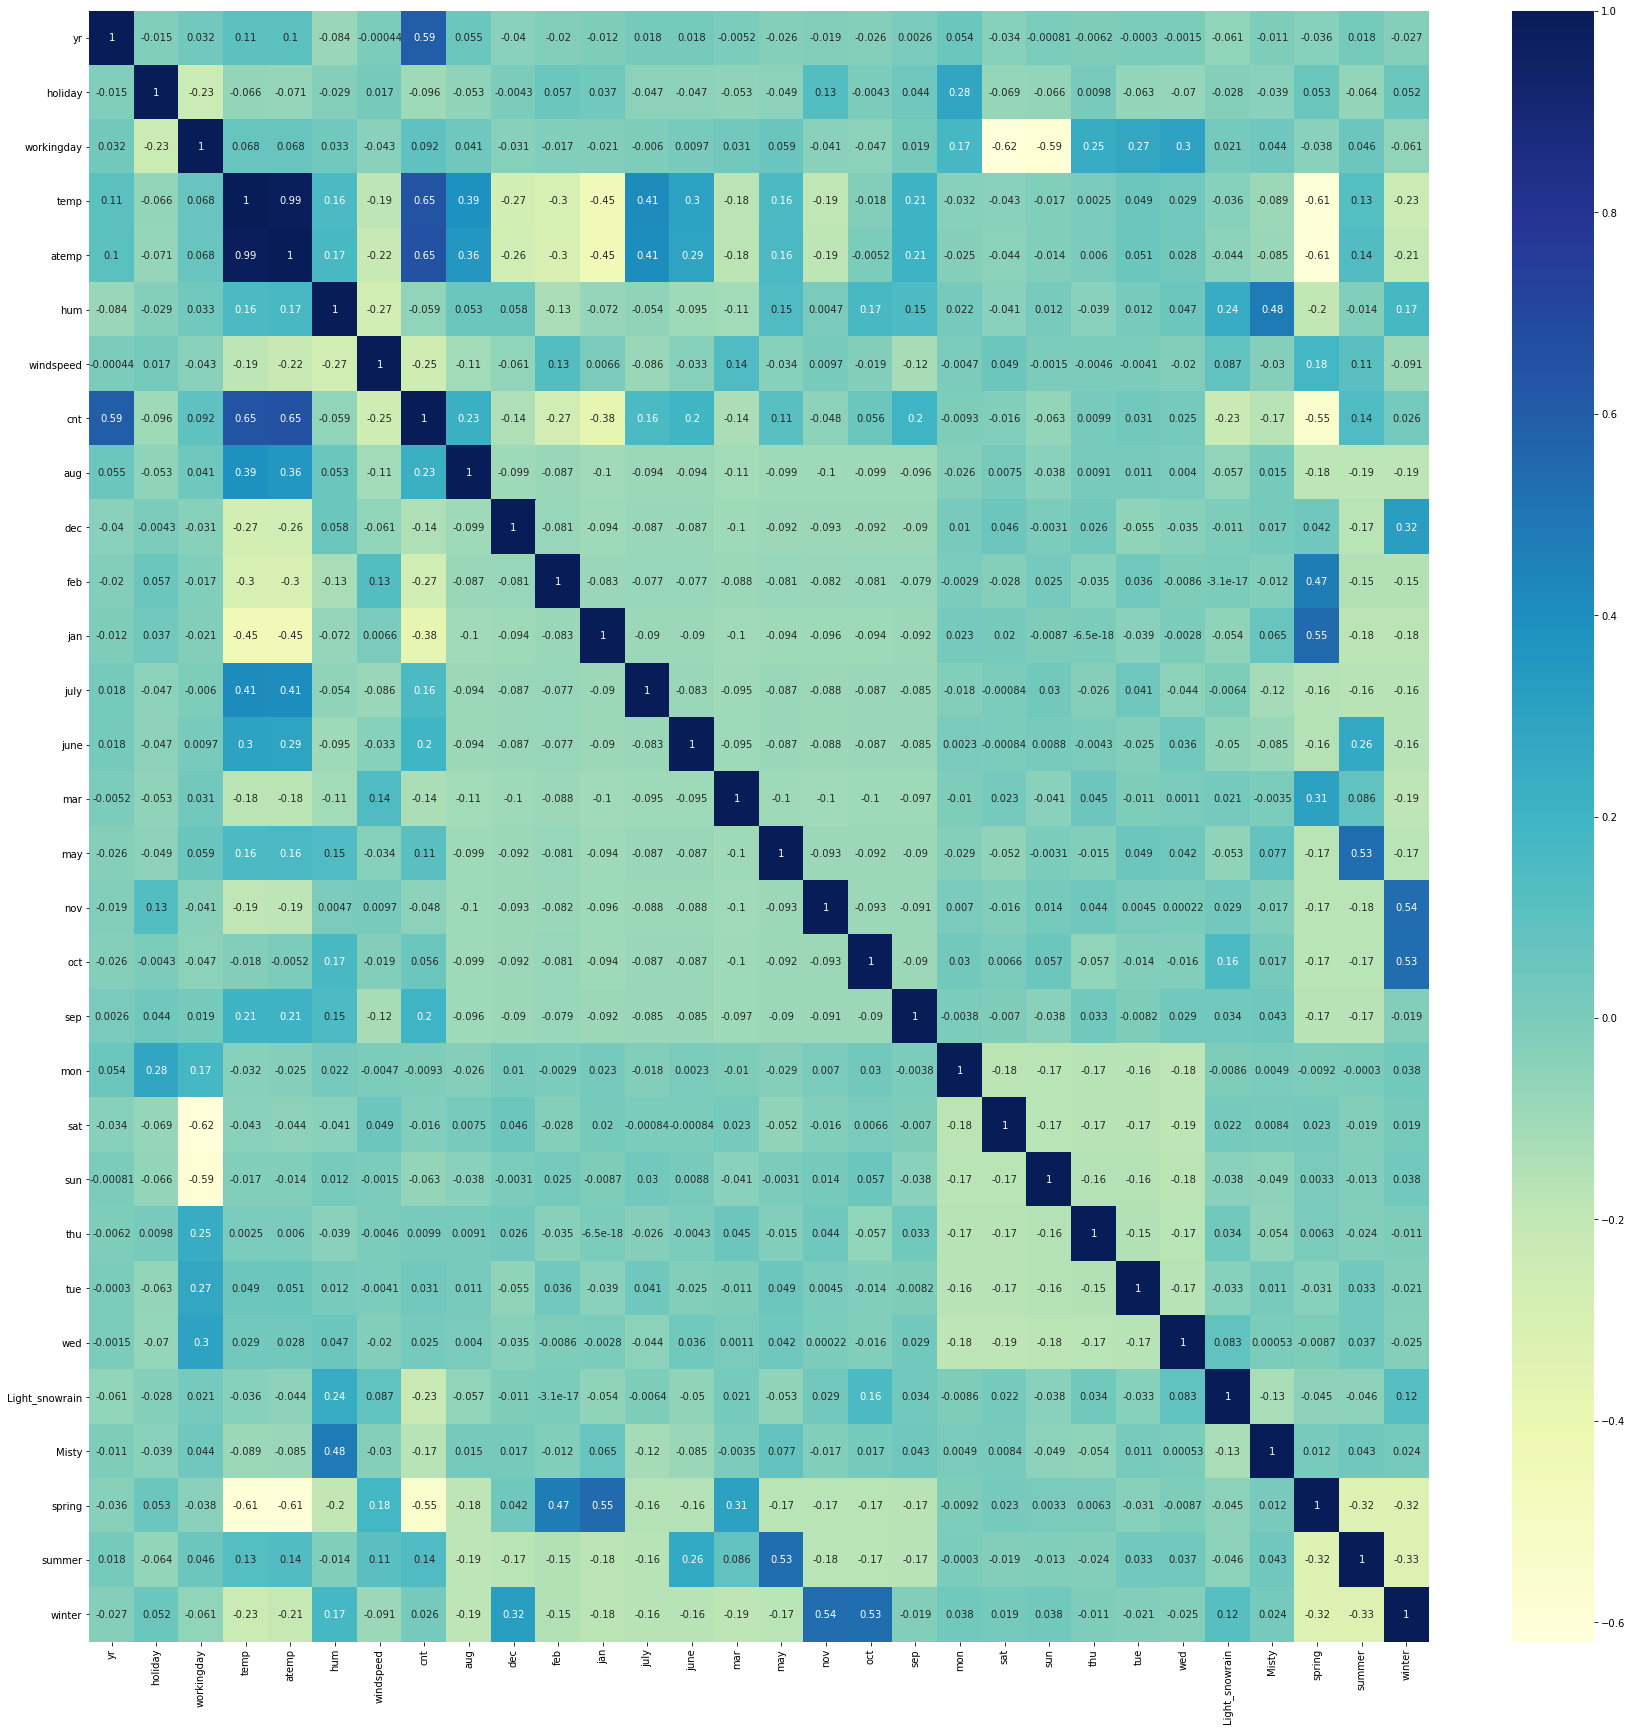

In [132]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
#matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Step 5: Building a linear model

In [133]:
y_train = df_train.pop('cnt')
X_train = df_train

In [134]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [135]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [136]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [137]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [138]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [140]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [141]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [142]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,yr,2.09
9,sat,1.98


In [98]:
# add constant
X_train_lm = sm.add_constant(X_train_rfe)

# create first model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()

# params
lr_model.params

const             0.251893
yr                0.230527
holiday          -0.058173
workingday        0.043335
temp              0.509619
hum              -0.156299
windspeed        -0.186259
jan              -0.034512
july             -0.052918
sep               0.081395
sat               0.053552
Light_snowrain   -0.247464
Misty            -0.056318
spring           -0.050897
summer            0.050762
winter            0.093301
dtype: float64

In [143]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.7
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.16e-188
Time:                        10:33:07   Log-Likelihood:                 504.48
No. Observations:                 510   AIC:                            -983.0
Df Residuals:                     497   BIC:                            -927.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1484      0.031      4.827      0.000       0.088       0.209
yr                 0.2342      0.008     28.718      0.000       0.218       0.250
holiday           -0.0547      0.028     -1.982      0.048      -0.109      -0.000
workingday         0.0474      0.012      4.016      0.000       0.024       0.071
temp               0.4789      0.033     14.699      0.000       0.415       0.543
windspeed         -0.1492      0.025     -5.990      0.000      -0.198      -0.100
sep                0.0894      0.016      5.559      0.000       0.058       0.121
sat                0.0585      0.015      3.942      0.000       0.029       0.088
Light_snowrain    -0.2904      0.025    -11.844      0.000      -0.339      -0.242
Misty             -0.0809      0.009     -9.318      0.000      -0.098      -0.064
spring            -0.0543      0.021     -2.644      0.008      -0.095      -0.014
summer             0.0625      0.014      4.456      0.000       0.035       0.090
winter             0.0968      0.017      5.863      0.000       0.064       0.129
==============================================================================
Omnibus:                       70.944   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.372
Skew:                          -0.729   Prob(JB):                     2.74e-37
Kurtosis:                       5.408   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,yr,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


In [145]:
X_train_lm = sm.add_constant(X_train_new)

# create first model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.60e-188
Time:                        10:36:45   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.520      0.000       0.112       0.235
yr                 0.2345      0.008     29.009      0.000       0.219       0.250
holiday           -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday         0.0464      0.012      3.966      0.000       0.023       0.069
temp               0.4722      0.034     14.005      0.000       0.406       0.538
windspeed         -0.1563      0.025     -6.286      0.000      -0.205      -0.107
jan               -0.0392      0.018     -2.227      0.026      -0.074      -0.005
july              -0.0479      0.018     -2.614      0.009      -0.084      -0.012
sep                0.0755      0.017      4.527      0.000       0.043       0.108
sat                0.0583      0.015      3.968      0.000       0.029       0.087
Light_snowrain    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Misty             -0.0813      0.009     -9.437      0.000      -0.098      -0.064
spring            -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer             0.0445      0.015      2.967      0.003       0.015       0.074
winter             0.0784      0.017      4.562      0.000       0.045       0.112
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
# We can workingday jan variable as it has high VIF
X_train_new = X_train_new.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.16
3,windspeed,4.64
10,spring,2.76
11,summer,2.24
0,yr,2.07
12,winter,1.80
4,jan,1.61
5,july,1.59
9,Misty,1.56
6,sep,1.34


In [147]:
X_train_lm = sm.add_constant(X_train_new)

# create first model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.48e-186
Time:                        10:45:41   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2120      0.030      6.978      0.000       0.152       0.272
yr                 0.2347      0.008     28.620      0.000       0.219       0.251
holiday           -0.0934      0.026     -3.589      0.000      -0.144      -0.042
temp               0.4734      0.034     13.837      0.000       0.406       0.541
windspeed         -0.1570      0.025     -6.226      0.000      -0.207      -0.107
jan               -0.0386      0.018     -2.159      0.031      -0.074      -0.003
july              -0.0508      0.019     -2.735      0.006      -0.087      -0.014
sep                0.0762      0.017      4.504      0.000       0.043       0.109
sat                0.0201      0.011      1.787      0.075      -0.002       0.042
Light_snowrain    -0.2859      0.025    -11.619      0.000      -0.334      -0.238
Misty             -0.0794      0.009     -9.097      0.000      -0.097      -0.062
spring            -0.0615      0.021     -2.902      0.004      -0.103      -0.020
summer             0.0437      0.015      2.871      0.004       0.014       0.074
winter             0.0755      0.017      4.334      0.000       0.041       0.110
==============================================================================
Omnibus:                       66.209   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.692
Skew:                          -0.716   Prob(JB):                     1.03e-31
Kurtosis:                       5.160   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
# We can drop sat variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,yr,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,Misty,1.56
6,sep,1.34


In [149]:
X_train_lm = sm.add_constant(X_train_new)

# create first model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          8.14e-187
Time:                        10:49:44   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.088      0.000       0.156       0.275
yr                 0.2343      0.008     28.517      0.000       0.218       0.250
holiday           -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp               0.4721      0.034     13.772      0.000       0.405       0.539
windspeed         -0.1549      0.025     -6.135      0.000      -0.205      -0.105
jan               -0.0383      0.018     -2.138      0.033      -0.073      -0.003
july              -0.0503      0.019     -2.706      0.007      -0.087      -0.014
sep                0.0764      0.017      4.506      0.000       0.043       0.110
Light_snowrain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
Misty             -0.0793      0.009     -9.067      0.000      -0.096      -0.062
spring            -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer             0.0434      0.015      2.845      0.005       0.013       0.073
winter             0.0757      0.017      4.335      0.000       0.041       0.110
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,yr,2.07
10,winter,1.78
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_snowrain,1.08


In [151]:
X_train_lm = sm.add_constant(X_train_new)

# create first model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          5.06e-187
Time:                        10:51:29   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.746      0.000       0.141       0.258
yr                 0.2336      0.008     28.352      0.000       0.217       0.250
holiday           -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp               0.4910      0.033     14.770      0.000       0.426       0.556
windspeed         -0.1479      0.025     -5.887      0.000      -0.197      -0.099
july              -0.0521      0.019     -2.790      0.005      -0.089      -0.015
sep                0.0768      0.017      4.517      0.000       0.043       0.110
Light_snowrain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Misty             -0.0802      0.009     -9.146      0.000      -0.097      -0.063
spring            -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer             0.0465      0.015      3.051      0.002       0.017       0.076
winter             0.0817      0.017      4.730      0.000       0.048       0.116
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


In [153]:
X_train_lm = sm.add_constant(X_train_new)

# create first model
lr = sm.OLS(y_train,X_train_lm)

# fit
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.47e-186
Time:                        10:53:25   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.447      0.000       0.133       0.249
yr                 0.2341      0.008     28.237      0.000       0.218       0.250
holiday           -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp               0.4777      0.033     14.423      0.000       0.413       0.543
windspeed         -0.1481      0.025     -5.854      0.000      -0.198      -0.098
sep                0.0910      0.016      5.566      0.000       0.059       0.123
Light_snowrain    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Misty             -0.0787      0.009     -8.938      0.000      -0.096      -0.061
spring            -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer             0.0621      0.014      4.350      0.000       0.034       0.090
winter             0.0945      0.017      5.630      0.000       0.062       0.127
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Step 6: Residual Analysis of the train data
As all VIF are less than 5 and almost all p-values are 0, we can do residual analysis

In [155]:
X_train_lm

,const,yr,holiday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


In [157]:
y_train_pred = lr_model.predict(X_train_lm)
y_train_pred

576    0.775223
426    0.464371
728    0.388469
482    0.569433
111    0.282980
         ...   
578    0.810023
53     0.215752
350    0.261221
79     0.316747
520    0.641815
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

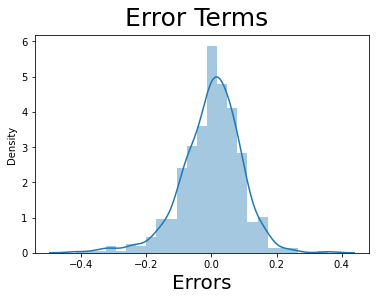

In [159]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 25)
fig.suptitle('Error Terms', fontsize = 25) 
plt.xlabel('Errors', fontsize = 20)

# Step 7: Making Predictions Using the Final Model

# Applying the scaling on the test sets

In [161]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [162]:
y_test = df_test.pop('cnt')
X_test = df_test

In [163]:
col = X_train_new.columns

X_test = X_test[col]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [164]:
y_pred = lr_model.predict(X_test_lm)

In [167]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8038

# Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

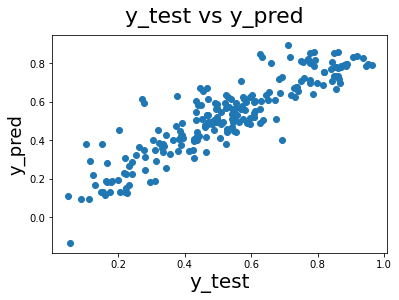

In [168]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 22) 
plt.xlabel('y_test', fontsize = 20)
plt.ylabel('y_pred', fontsize = 18)

In [170]:
lr_model.params

const             0.190855
yr                0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
sep               0.090998
Light_snowrain   -0.285031
Misty            -0.078741
spring           -0.055406
summer            0.062076
winter            0.094476
dtype: float64

In [171]:
round(lr_model.params,4)

const             0.1909
yr                0.2341
holiday          -0.0963
temp              0.4777
windspeed        -0.1481
sep               0.0910
Light_snowrain   -0.2850
Misty            -0.0787
spring           -0.0554
summer            0.0621
winter            0.0945
dtype: float64

cnt = 0.1909 + 0.2341*yr - 0.0963*holiday + 0.4777*temp - 0.1481*windspeed + 0.0910*sep - 0.2850*Light_snowrain - 0.0787*Misty - 0.0554*spring + 0.0621*summer + 0.0945*winter

In [172]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
adjusted_r2

0.7944

Results-
     Train dataset R^2          : 0.833
     Test dataset R^2           : 0.8038
     Train dataset Adjusted R^2 : 0.829    
     Test dataset Adjusted R^2  : 0.7944